### Pandas DataFrame

Example how to work with pandas DataFrame<br>
modified from this video (in Russian): <br>
https://www.youtube.com/watch?v=_D1xhwXUebI

In [1]:
import os, sys
import pandas as pd
import numpy as np

In [2]:
# Constants

TITANIC_CSV_DATA_URL = "https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Titanic.csv"

# Original column's names.
INDEX_COL = 0
NAME_COL = "Name"
SEX_COL = "Sex"
PCLASS_COL = "PClass"
AGE_COL = "Age"
SURVIVED_COL = "Survived"

# New column's names.
AGE_GROUP_COL = "AgeGroup"

# Other constants.
HEAD_ROWS_TO_SHOW = 15

# Data load

In [3]:
### original load - and save into local directory
# df = pd.read_csv(TITANIC_CSV_DATA_URL)
# df[:HEAD_ROWS_TO_SHOW]
# df = pd.read_csv(TITANIC_CSV_DATA_URL, index_col=INDEX_COL)
# df[:HEAD_ROWS_TO_SHOW]
# df.to_csv("data/Titanic.csv", index=False)

### Load from local directory
df = pd.read_csv("data/Titanic.csv")

# Analyze of data types

In [4]:
df.dtypes

Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
SexCode       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1313 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
 5   SexCode   1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB


In [6]:
df.shape

(1313, 6)

# Categorical features

In [7]:
df[SEX_COL][:HEAD_ROWS_TO_SHOW]

0     female
1     female
2       male
3     female
4       male
5       male
6     female
7       male
8     female
9       male
10      male
11    female
12    female
13      male
14      male
Name: Sex, dtype: object

In [8]:
df[SEX_COL].value_counts()

male      851
female    462
Name: Sex, dtype: int64

In [9]:
df[PCLASS_COL].value_counts()

3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

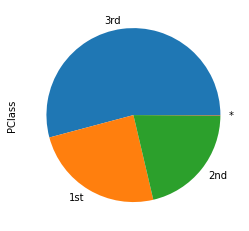

In [10]:
_ = df[PCLASS_COL].value_counts().plot.pie()

# Quantitative features

In [11]:
df[AGE_COL].value_counts()

22.00    35
30.00    31
21.00    31
18.00    30
36.00    29
         ..
0.80      1
67.00     1
0.33      1
0.17      1
69.00     1
Name: Age, Length: 75, dtype: int64

In [12]:
df[AGE_COL].mean()

30.397989417989418

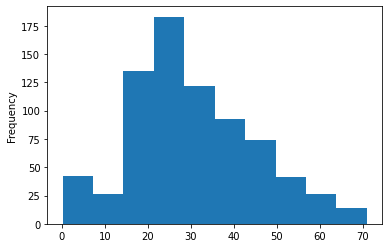

In [13]:
_ = df[AGE_COL].plot(kind="hist")

In [14]:
# df[AGE_GROUP_COL] = df[AGE_COL].map(lambda age: int(age // 10))
#     The above gives error: ValueError: cannot convert float NaN to integer
# df[:HEAD_ROWS_TO_SHOW]

In [15]:
df[AGE_GROUP_COL] = df[AGE_COL]
df[AGE_GROUP_COL].fillna(-1, inplace=True)
df[AGE_GROUP_COL] = df[AGE_GROUP_COL].map(lambda age: int(age // 10) + 1)
df[:HEAD_ROWS_TO_SHOW]

,Name,PClass,Age,Sex,Survived,SexCode,AgeGroup
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,3
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,4
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,3
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,1
5,"Anderson, Mr Harry",1st,47.00,male,1,0,5
6,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1,7
7,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0,4
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1,6
9,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0,8


In [16]:
df[AGE_GROUP_COL].value_counts()

0    557
3    252
4    168
5    106
2     96
6     54
1     53
7     23
8      4
Name: AgeGroup, dtype: int64

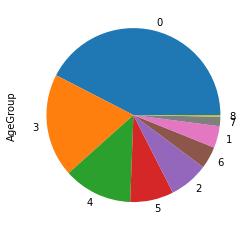

In [17]:
_ = df[AGE_GROUP_COL].value_counts().plot.pie()

# Investigation of the correlation between 2 features

In [18]:
df[[AGE_GROUP_COL, SURVIVED_COL]][:HEAD_ROWS_TO_SHOW]

,AgeGroup,Survived
0,3,1
1,1,0
2,4,0
3,3,0
4,1,1
5,5,1
6,7,1
7,4,0
8,6,1
9,8,0


In [19]:
df_age_survived = df.groupby([AGE_GROUP_COL, SURVIVED_COL])
print(type(df_age_survived))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [20]:
df_age_survived.size()

AgeGroup  Survived
0         0           420
          1           137
1         0            16
          1            37
2         0            52
          1            44
3         0           168
          1            84
4         0            98
          1            70
5         0            63
          1            43
6         0            28
          1            26
7         0            14
          1             9
8         0             4
dtype: int64

In [21]:
# convert to convenient DataFrame
df_as = df_age_survived.size().unstack()
display(df_as)

Survived,0,1
AgeGroup,,
0,420.0,137.0
1,16.0,37.0
2,52.0,44.0
3,168.0,84.0
4,98.0,70.0
5,63.0,43.0
6,28.0,26.0
7,14.0,9.0
8,4.0,NaN


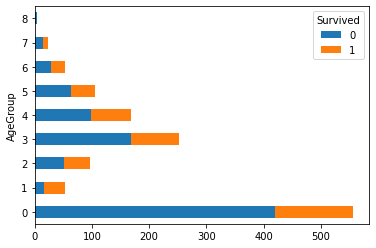

In [22]:
_ = df_as.fillna(0).plot(kind='barh', stacked=True)

In [23]:
# fill nulls with zero
df_as2 = df_as[1:].fillna(0)
display(df_as2)

Survived,0,1
AgeGroup,,
1,16.0,37.0
2,52.0,44.0
3,168.0,84.0
4,98.0,70.0
5,63.0,43.0
6,28.0,26.0
7,14.0,9.0
8,4.0,0.0


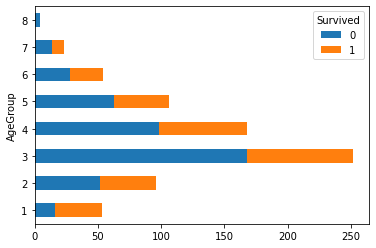

In [24]:
_ = df_as2.plot(kind='barh', stacked=True)

In [25]:
# Let's express it in percent
df_as3 = df_as2.copy()
df_as3["Total"] = df_as3[0] + df_as3[1]
df_as3 = df_as3.copy() # Important !!

In [26]:
df_as3[0] = 100.0*df_as3[0]/df_as3["Total"]
df_as3[1] = 100.0*df_as3[1]/df_as3["Total"]
df_as4 = df_as3[[0,1]]
df_as4

Survived,0,1
AgeGroup,,
1,30.188679,69.811321
2,54.166667,45.833333
3,66.666667,33.333333
4,58.333333,41.666667
5,59.433962,40.566038
6,51.851852,48.148148
7,60.869565,39.130435
8,100.000000,0.000000


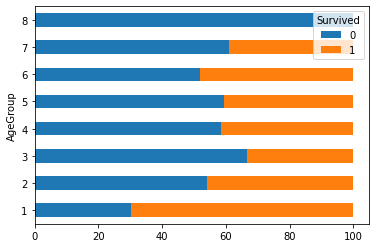

In [27]:
_ = df_as4.plot(kind="barh", stacked=True)

In [28]:
# we can do similar analysis of survivorship by Sex and PClass
print(df.columns) # ['Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode', 'AgeGroup']
print("-"*40)
print(df.AgeGroup.value_counts())
print("-"*40)
print(df.Sex.value_counts())
print("-"*40)
print(df.PClass.value_counts())

Index(['Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode', 'AgeGroup'], dtype='object')
----------------------------------------
0    557
3    252
4    168
5    106
2     96
6     54
1     53
7     23
8      4
Name: AgeGroup, dtype: int64
----------------------------------------
male      851
female    462
Name: Sex, dtype: int64
----------------------------------------
3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64


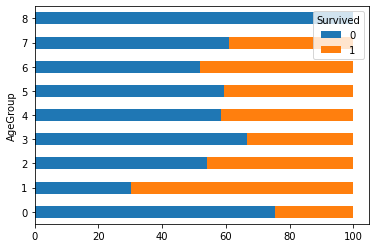

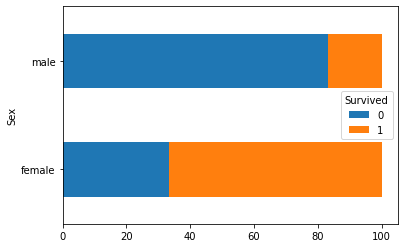

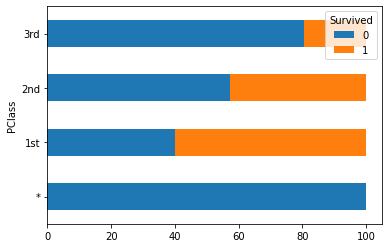

In [29]:
for mycol in ["AgeGroup", "Sex", "PClass"]:
    _df = df.groupby([mycol, SURVIVED_COL]).size().unstack().fillna(0).copy()
    _df["Total"] = _df[0] + _df[1]
    _df = _df.copy()
    _df[0] = 100.0*_df[0]/_df["Total"]
    _df[1] = 100.0*_df[1]/_df["Total"]
    _df2   = _df[[0,1]]
    _ = _df2.plot(kind="barh", stacked=True)